# Image Gradients

- Gradient(기울기)는 영상의 edge 및 그 방향을 찾을 때 활용됨

- 이미지 (x, y)에서의 벡터값(밝기와 밝기의 변화하는 방향)을 구해서 해당 pixel이 edge에 얼마나 가까운지, 그 방향이 어디인지 알 수 있음

### Sobel & Scharr Filter

- Gaussian smoothing과 미분을 이용

- 노이즈가 있는 이미지에 적용하면 좋음

- X축과 Y축을 미분하는 방법으로 경계값을 계산

- `cv2.Sobel()`
  - Parameters
    - `src` : input image

    - `ddepth` : output image의 depth, -1이면 input image와 동일.

    - `dx` : x축 미분 차수.

    - `dy` : y축 미분 차수.

    - `ksize` : kernel size(ksize x ksize)

- `cv2.Scharr()`

  - `cv2.Sobel()`과 동일하지만 `ksize`가 sobel의 3x3보다 정확하게 적용됨

  ![](https://cdn.pixabay.com/photo/2020/02/20/19/48/travel-4865665_960_720.jpg)
  
  <sub>[이미지 출처] https://pixabay.com/photos/travel-flight-schedule-ad-plan-4865665/</sub>

In [2]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
import matplotlib.pyplot as plt

In [3]:
up = files.upload()

Saving travel.jpg to travel.jpg


In [4]:
img = cv2.imread('travel.jpg', 0)
img.shape

(434, 640)

- Sobel

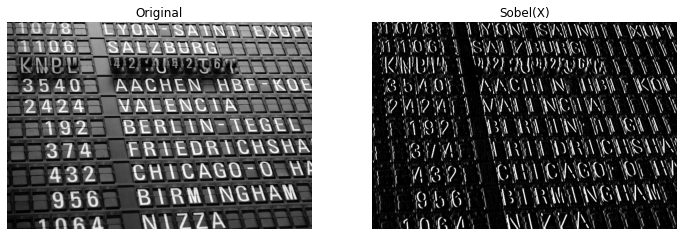

In [6]:
sobelx = cv2.Sobel(img, ddepth=cv2.CV_8U, dx = 1, dy = 0, ksize=3)
plt.figure(figsize=(12,6))
plt.subplot(121), plt.imshow(img, cmap='gray'),plt.title('Original'), plt.axis('off')
plt.subplot(122), plt.imshow(sobelx, cmap='gray'),plt.title('Sobel(X)'), plt.axis('off')
plt.show()

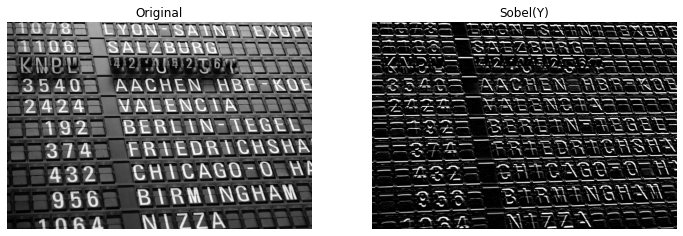

In [7]:
sobely = cv2.Sobel(img, ddepth=cv2.CV_8U, dx = 0, dy = 1, ksize=3)
plt.figure(figsize=(12,6))
plt.subplot(121), plt.imshow(img, cmap='gray'),plt.title('Original'), plt.axis('off')
plt.subplot(122), plt.imshow(sobely, cmap='gray'),plt.title('Sobel(Y)'), plt.axis('off')
plt.show()

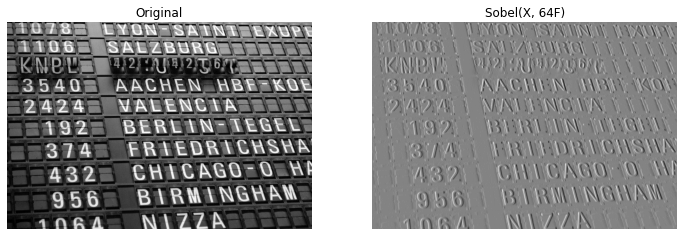

In [8]:
sobelx = cv2.Sobel(img, ddepth=cv2.CV_64F, dx = 1, dy = 0, ksize=3)
plt.figure(figsize=(12,6))
plt.subplot(121), plt.imshow(img, cmap='gray'),plt.title('Original'), plt.axis('off')
plt.subplot(122), plt.imshow(sobelx, cmap='gray'),plt.title('Sobel(X, 64F)'), plt.axis('off')
plt.show()

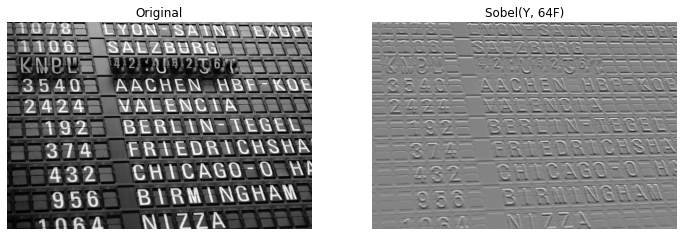

In [10]:
sobely = cv2.Sobel(img, ddepth=cv2.CV_64F, dx = 0, dy = 1, ksize=3)
plt.figure(figsize=(12,6))
plt.subplot(121), plt.imshow(img, cmap='gray'),plt.title('Original'), plt.axis('off')
plt.subplot(122), plt.imshow(sobely, cmap='gray'),plt.title('Sobel(Y, 64F)'), plt.axis('off')
plt.show()

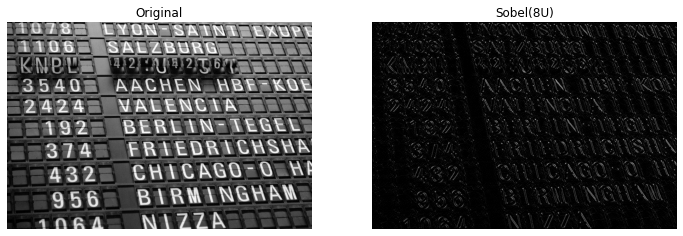

In [13]:
sobel = cv2.Sobel(img, ddepth=cv2.CV_8U, dx = 1, dy = 1, ksize=3)
plt.figure(figsize=(12,6))
plt.subplot(121), plt.imshow(img, cmap='gray'),plt.title('Original'), plt.axis('off')
plt.subplot(122), plt.imshow(sobel, cmap='gray'),plt.title('Sobel(8U)'), plt.axis('off')
plt.show()

### Laplacian 함수
- 이미지의 가로와 세로에 대한 Gradient를 2차 미분한 값

- Sobel filter에 미분의 정도가 더해진 것과 비슷함 

  - (dx와 dy가 2인 경우) blob(주위의 pixel과 확연한 pixel차이를 나타내는 덩어리)검출에 많이 사용됨

- `cv2.Laplacian()`

  - Parameters
    - `src` : source image

    - `ddepth` : output image의 depth.


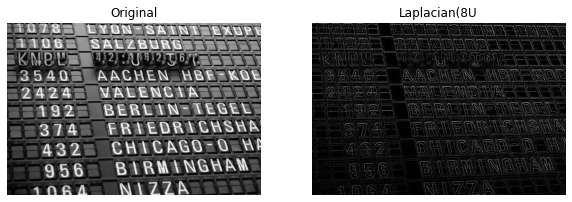

In [11]:
laplacian = cv2.Laplacian(img, cv2.CV_8U)
plt.figure(figsize=(10,4))
plt.subplot(121), plt.imshow(img, cmap='gray'),plt.title('Original'), plt.axis('off')
plt.subplot(122), plt.imshow(laplacian, cmap='gray'),plt.title('Laplacian(8U'), plt.axis('off')
plt.show()

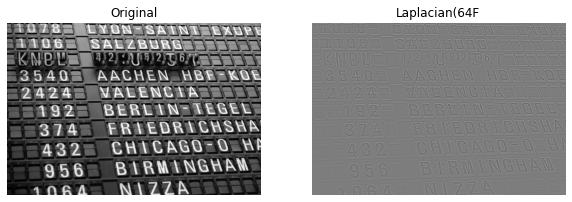

In [12]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)
plt.figure(figsize=(10,4))
plt.subplot(121), plt.imshow(img, cmap='gray'),plt.title('Original'), plt.axis('off')
plt.subplot(122), plt.imshow(laplacian, cmap='gray'),plt.title('Laplacian(64F'), plt.axis('off')
plt.show()

### Canny Edge Detection
- 가장 유명한 Edge Detection 방법

- 아래의 단계를 거침

  - `Noise Reduction`  
    - 이미지의 Noise를 제거

    - 이때 5x5의 Gaussian filter를 이용

  - `Edge Gradient Detection`
    - 이미지에서 Gradient의 방향과 강도를 확인
    
    - 경계값에서는 주변과 색이 다르기 때문에 미분값이 급속도로 변하게 됨
    
    - 이를 통해 경계값 후보군을 선별

  - `Non-maximum Suppression`

    - 이미지의 pixel을 Full scan하여 Edge가 아닌 pixel은 제거

  - `Hysteresis Thresholding`
    
    - 이제 지금까지 Edge로 판단된 pixel이 진짜 edge인지 판별하는 작업 진행
    
    - max val과 minVal(임계값)을 설정하여 maxVal 이상은 강한 Edge, min과 max사이는 약한 edge로 설정
    
    - 이제 약한 edge가 진짜 edge인지 확인하기 위해서 강한 edge와 연결이 되어 있으면 edge로 판단하고, 그러지 않으면 제거


- `cv2.Canny()`

  - Parameters

    - `image` : 8-bit input image

    - `threshold1` : Hysteresis Thredsholding 작업에서의 min 값

    - `threshold2` : Hysteresis Thredsholding 작업에서의 max 값



In [14]:
canny1 = cv2.Canny(img, 30, 70)
canny2 = cv2.Canny(img, 50, 100)
canny3 = cv2.Canny(img, 100, 150)
canny4 = cv2.Canny(img, 100, 200)
canny5 = cv2.Canny(img, 150, 250)


In [15]:
titles = ['Original', 'Canny(30,70)', 'Canny(50,100)', 'Canny(100,150)','Canny(100,200)','Canny(150,200)']
images = [img, canny1, canny2, canny3, canny4, canny5]

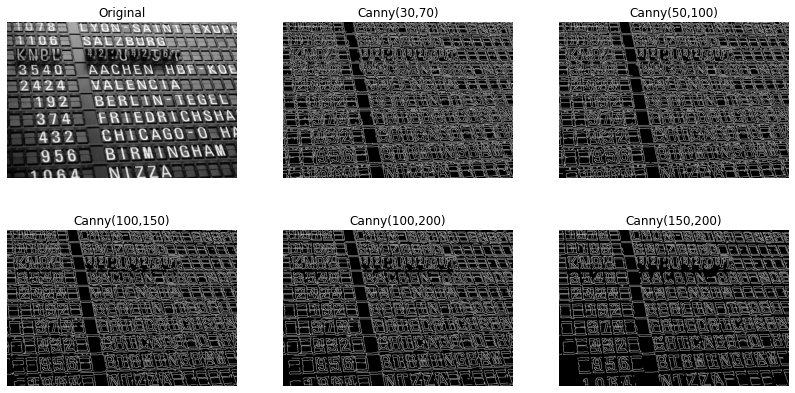

In [16]:
plt.figure(figsize=(14,7))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

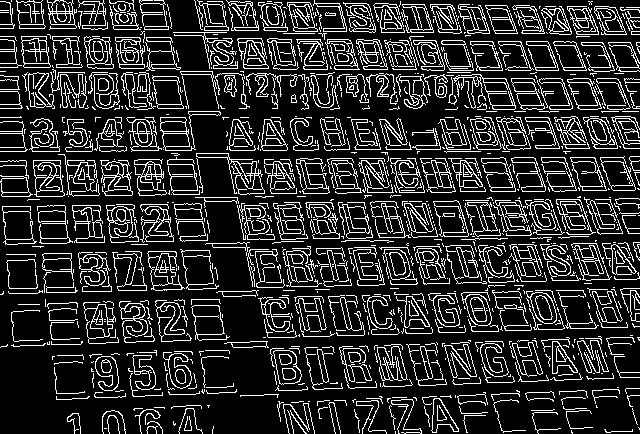

In [17]:
cv2_imshow(canny5)